In [442]:
require('ggplot2')
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library('svMisc') # progress bar
require('usedist')

In [439]:
install.packages(pkgs = 'usedist', repos = 'https://mirrors.tuna.tsinghua.edu.cn/CRAN/')


The downloaded binary packages are in
	/var/folders/8p/hqxrnbwx4k5_w5l78b_gk0b40000gn/T//Rtmpys2Ww4/downloaded_packages


In [253]:
freq_matrix_with_puncs_included = as.matrix(read.table('termdocmatrix/matrix.txt', sep = ','))

In [106]:
articles = read.csv('termdocmatrix/index_to_article.csv')

In [254]:
pure_words = read.csv('termdocmatrix/pure_words.csv')

In [255]:
pure_words_indexes = pure_words[, 1]

In [258]:
# each row correspond to a doc, each col correspond to a term
freq_matrix = freq_matrix_with_puncs_included[, pure_words_indexes]

In [273]:
term_freq_summary = sapply(
    1:ncol(freq_matrix),
    function(j) {
        sum(freq_matrix[, j])
    }
)

In [289]:
idf = sapply(
    1:ncol(freq_matrix),
    function(j) {
        non_zeros = sum(freq_matrix[, j] != 0);
        log(nrow(freq_matrix)/abs(non_zeros))
    }
)

In [296]:
idf_mat = matrix(
    data = rep(idf, times = nrow(freq_matrix)),
    ncol = length(idf),
    byrow = TRUE
)

In [298]:
tf_idf = (freq_matrix*idf_mat)/matrix(
    rep(
        term_freq_summary, 
        times=nrow(freq_matrix)
    ),
    ncol=length(term_freq_summary),
    byrow=TRUE
)

In [487]:
doc_svd = svd(tf_idf)

In [488]:
matD = diag(doc_svd$d)

In [489]:
matU = doc_svd$u

In [490]:
matV = doc_svd$v

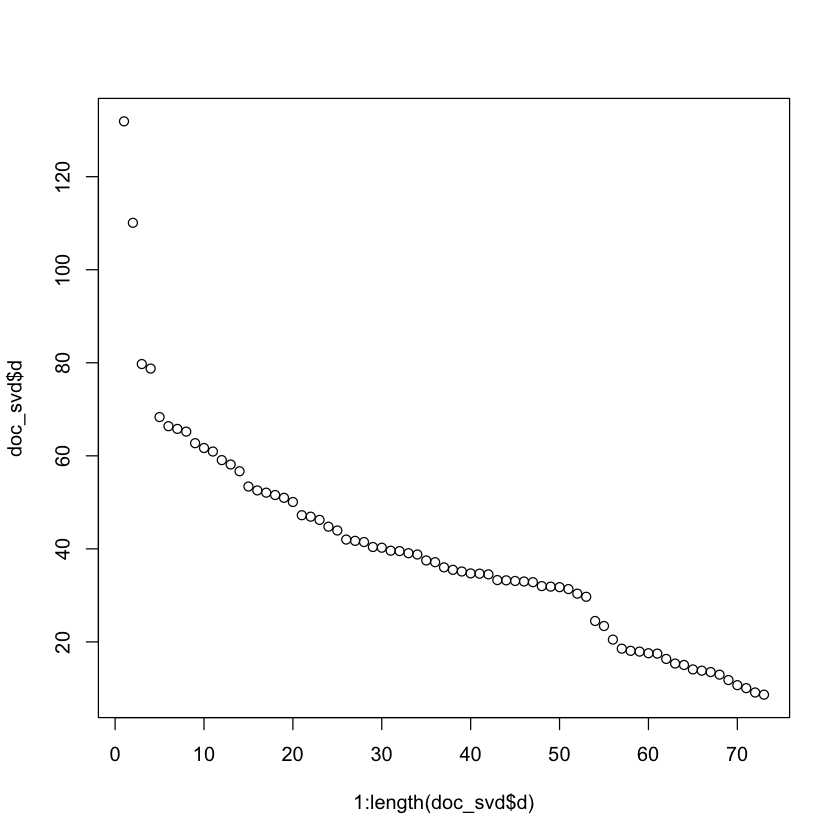

In [492]:
plot(
    y = doc_svd$d,
    x = 1:length(doc_svd$d)
)

In [493]:
selected_r = 4

In [494]:
doc_coords = matU[, 1:selected_r] %*% matD[1:selected_r, 1:selected_r]

In [495]:
term_coords = matV[, 1:selected_r] %*% matD[1:selected_r, 1:selected_r]

In [509]:
v1 = term_coords[, 1]
v2 = term_coords[, 2]
v3 = term_coords[, 3]
v4 = term_coords[, 4]

In [514]:
v1_mat = matrix(data = rep(x = v1, times = length(v1)), byrow = TRUE, ncol = length(v1))
v2_mat = matrix(data = rep(x = v2, times = length(v1)), byrow = TRUE, ncol = length(v1))
v3_mat = matrix(data = rep(x = v3, times = length(v1)), byrow = TRUE, ncol = length(v1))
v4_mat = matrix(data = rep(x = v4, times = length(v1)), byrow = TRUE, ncol = length(v1))

In [525]:
v1_mat = c()

In [526]:
v2_mat = c()

In [527]:
v3_mat = c()

In [528]:
v4_mat = c()

In [523]:
my_cos_1 = abs(v1_mat * t(v1_mat) + v2_mat * t(v2_mat) + v3_mat * t(v3_mat) + v4_mat * t(v4_mat))/(
    sqrt(v1_mat * v1_mat + v2_mat * v2_mat + v3_mat * v3_mat + v4_mat * v4_mat)*sqrt(
        t(v1_mat) * t(v1_mat) + t(v2_mat) * t(v2_mat) + t(v3_mat) * t(v3_mat) + t(v4_mat) * t(v4_mat)
    )
)

In [529]:
my_cos_1 = 1 - my_cos_1

In [532]:
fviz_dist(as.dist(my_cos_1), gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

ERROR: Error in stats::hclust(dist.obj, method = "ward.D2"): NA/NaN/Inf in foreign function call (arg 10)


In [533]:
hc1 = hclust(as.dist(my_cos_1))

ERROR: Error in hclust(as.dist(my_cos_1)): NA/NaN/Inf in foreign function call (arg 10)


In [480]:
cut_avg <- cutree(hc1, k = 6)

In [486]:
articles[cut_avg==6,]

,index,article
,<int>,<fct>
15,14,drawing-figures.md
25,24,hello-gitbook.md
27,26,how-to-ensure-the-validity-of-email-sender-address.md
31,30,implementing-a-rubkis-cube-in-mathematica.md
32,31,interested-at.md
46,45,merge-two-sorted-array.md
55,54,new-changes-in-beyondstars-20-07-04.md
69,68,symlink-vs-harlink.md
73,72,vscode-linting.md
